In [34]:
from final_data import get_final_data
from functions import percentage_within_threshold

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('final_data.csv')
data = data.dropna(axis=0)
data.shape

(1728, 30)

In [17]:
# features for training
train_columns = ['Year', 'State FIPS', 'District', 'Voter Turnout %', 'Median Age', #'Median income',
                 'Male Population %', 'Female Population %', #'White %', 
                 'White (non Hispanic or Latino) %',
                 'Hispanic or Latino %', 'Black %', 'American Indian %', 'Asian %', 'Pacific %', 'Multiracial %',
                 'Less than HS %', 'HS grad %', 'Some college %', "Bachelor's degree %", "Graduate degree %",
                 'Below poverty line %', 'Income under 25k %', 'Income 25k to 50k %', 'Income 50k to 75k %',
                 'Income above 75k %']

# remove Year, State FIPS, District, White, Pacific, Multiracial, Male, Female, American Indian

# train_columns = ['Voter Turnout %', 'Median Age', 'Median income',
#                  'White (non Hispanic or Latino) %',
#                  'Hispanic or Latino %', 'Black %', 'Asian %', 
#                  'Less than HS %', 'HS grad %', 'Some college %', "Bachelor's degree %", "Graduate degree %",
#                  'Below poverty line %', 'Income under 25k %', 'Income 25k to 50k %', 'Income 50k to 75k %',
#                  'Income above 75k %']

<Axes: >

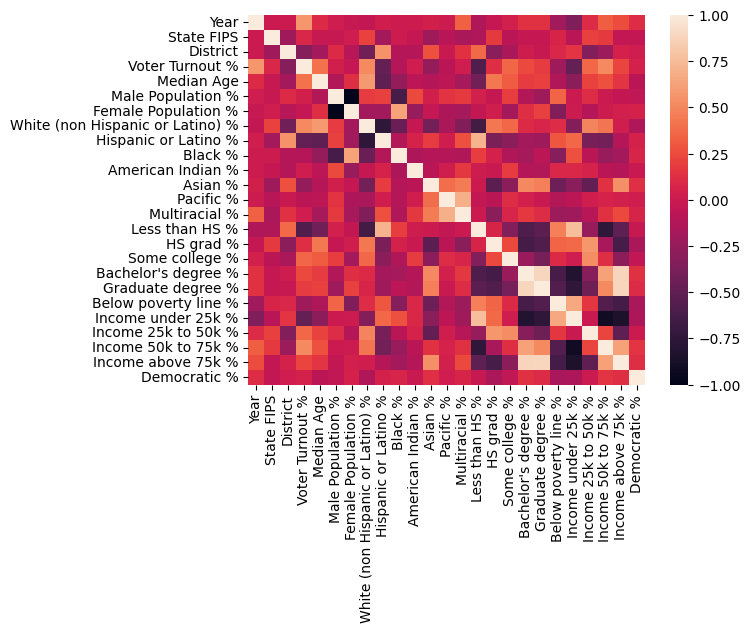

In [18]:
import seaborn as sns
sns.heatmap(data[train_columns + ['Democratic %']].corr())

<Axes: >

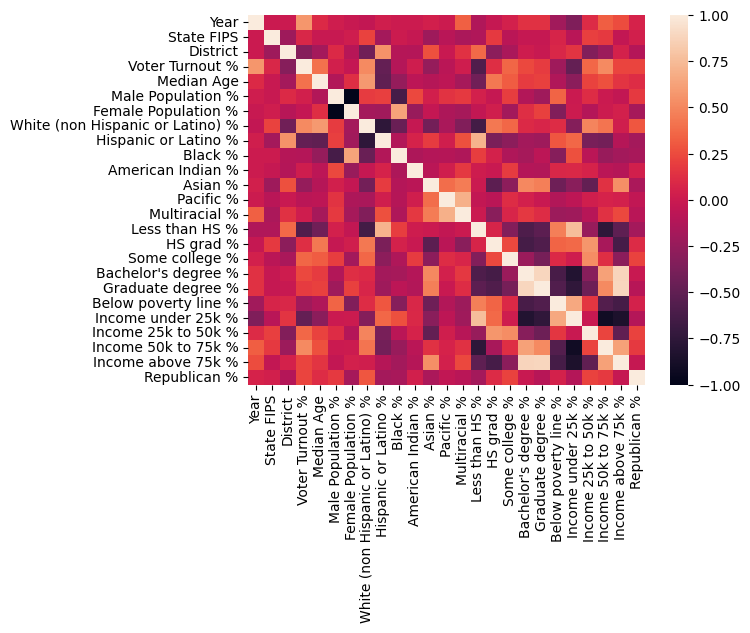

In [19]:
import seaborn as sns
sns.heatmap(data[train_columns + ['Republican %']].corr())

In [20]:
corrs_dem = data[train_columns + ['Democratic %']].corr()
corrs_dem = corrs_dem['Democratic %'].abs().sort_values(ascending=False)
print(corrs_dem)

Democratic %                        1.000000
Below poverty line %                0.164188
HS grad %                           0.159653
Income 50k to 75k %                 0.154794
Income under 25k %                  0.145590
Bachelor's degree %                 0.135999
White (non Hispanic or Latino) %    0.126978
Asian %                             0.125438
Income above 75k %                  0.118247
Year                                0.111587
Graduate degree %                   0.107877
Median Age                          0.081583
Black %                             0.076620
Multiracial %                       0.067573
Voter Turnout %                     0.052949
Female Population %                 0.051991
Male Population %                   0.051991
Hispanic or Latino %                0.051236
Some college %                      0.051231
State FIPS                          0.043099
District                            0.017396
Pacific %                           0.016681
Less than 

In [21]:
corrs_rep = data[train_columns + ['Republican %']].corr()
corrs_rep = corrs_rep['Republican %'].abs().sort_values(ascending=False)
print(corrs_rep)

Republican %                        1.000000
White (non Hispanic or Latino) %    0.292422
Voter Turnout %                     0.220866
Income 25k to 50k %                 0.218729
Some college %                      0.213874
Hispanic or Latino %                0.185932
Less than HS %                      0.182461
Income 50k to 75k %                 0.176284
Male Population %                   0.174836
Female Population %                 0.174836
Black %                             0.170724
Asian %                             0.149317
Income under 25k %                  0.114585
District                            0.113977
Median Age                          0.111393
HS grad %                           0.109102
Graduate degree %                   0.100300
Multiracial %                       0.092568
Year                                0.059172
Pacific %                           0.054353
Below poverty line %                0.052501
American Indian %                   0.034637
State FIPS

In [22]:
from sklearn.ensemble import RandomForestRegressor

X = data[train_columns + ['Democratic %']].drop(['Democratic %'], axis=1)
y = data[train_columns + ['Democratic %']]['Democratic %']

model = RandomForestRegressor()
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

print(feature_importances)


Income 50k to 75k %                 0.225538
Income 25k to 50k %                 0.096688
Graduate degree %                   0.076932
Voter Turnout %                     0.064416
Some college %                      0.061300
Asian %                             0.048558
White (non Hispanic or Latino) %    0.047471
Below poverty line %                0.042945
Hispanic or Latino %                0.037299
Income above 75k %                  0.035295
Median Age                          0.034358
Less than HS %                      0.034299
HS grad %                           0.033033
American Indian %                   0.026945
Income under 25k %                  0.020322
Multiracial %                       0.019646
Bachelor's degree %                 0.016498
Male Population %                   0.016227
Female Population %                 0.014143
Pacific %                           0.013182
State FIPS                          0.012914
Black %                             0.012042
District  

In [23]:
from sklearn.ensemble import RandomForestRegressor

X = data[train_columns + ['Republican %']].drop(['Republican %'], axis=1)
y = data[train_columns + ['Republican %']]['Republican %']

model = RandomForestRegressor()
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

print(feature_importances)


Income 50k to 75k %                 0.214719
Voter Turnout %                     0.078278
Some college %                      0.075390
White (non Hispanic or Latino) %    0.072799
Income 25k to 50k %                 0.065613
Asian %                             0.060112
Graduate degree %                   0.056406
Median Age                          0.042466
Below poverty line %                0.038450
Income under 25k %                  0.038188
Less than HS %                      0.032490
HS grad %                           0.029095
Black %                             0.023961
American Indian %                   0.022328
Bachelor's degree %                 0.021443
Female Population %                 0.020947
State FIPS                          0.020694
Hispanic or Latino %                0.019600
Pacific %                           0.017276
District                            0.013136
Multiracial %                       0.012839
Male Population %                   0.012550
Income abo

In [24]:
from sklearn.ensemble import RandomForestRegressor
import random

# Specify the number of random combinations to generate
num_combinations = 100

# Create a list of all feature column names (exclude the target variable)
feature_columns = data[train_columns + ['Democratic %']].columns.tolist()
feature_columns.remove('Democratic %')

# Initialize variables to keep track of the best combination and its importance
best_combination = None
best_combination_importance = 0.0

# Initialize a RandomForestRegressor model
model = RandomForestRegressor()

# Iterate through random combinations
for _ in range(num_combinations):
    # Generate a random combination of 10 features
    random_combination = random.sample(feature_columns, 10)
    
    # Extract the selected features from the DataFrame
    X_subset = data[random_combination]
    
    # Train the model with the selected features
    model.fit(X_subset, data['Democratic %'])
    
    # Calculate feature importances
    feature_importances = pd.Series(model.feature_importances_, index=random_combination).sum()
    
    # Check if this combination has higher importance than the current best
    if feature_importances > best_combination_importance:
        best_combination_importance = feature_importances
        best_combination = random_combination

# Print the best combination and its importance
print("Best Combination:", best_combination)
print("Best Combination Importance:", best_combination_importance)


Best Combination: ['Voter Turnout %', 'Median Age', 'Black %', 'State FIPS', "Bachelor's degree %", 'Income above 75k %', 'Year', 'Male Population %', 'American Indian %', 'Less than HS %']
Best Combination Importance: 1.0000000000000002


In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

features = data.drop(['Year', 'State', 'State Abbr', 'State FIPS', 'District', 'Democratic %', 'Republican %'], axis=1)
features_df = features
target = data['Democratic %']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 4, 6, 8]
}

random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42), 
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_model_dem = random_search.best_estimator_
y_pred = best_model_dem.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

feature_importances = best_model_dem.feature_importances_
features = list(features_df.columns)

Best Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': 6}
Best Score: 0.1686179044316212
Mean Squared Error: 2086.211851681309
R-squared Score: 0.20260812252650173


In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

features = data.drop(['Year', 'State', 'State Abbr', 'State FIPS', 'District', 'Democratic %', 'Republican %'], axis=1)
features_df = features
target = data['Republican %']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 4, 6, 8]
}

random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_model_rep = random_search.best_estimator_
y_pred = best_model_rep.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

feature_importances = best_model_rep.feature_importances_
features = list(features_df.columns)

Best Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': 6}
Best Score: 0.20053135595831476
Mean Squared Error: 1603.799420260749
R-squared Score: 0.2743338121764882


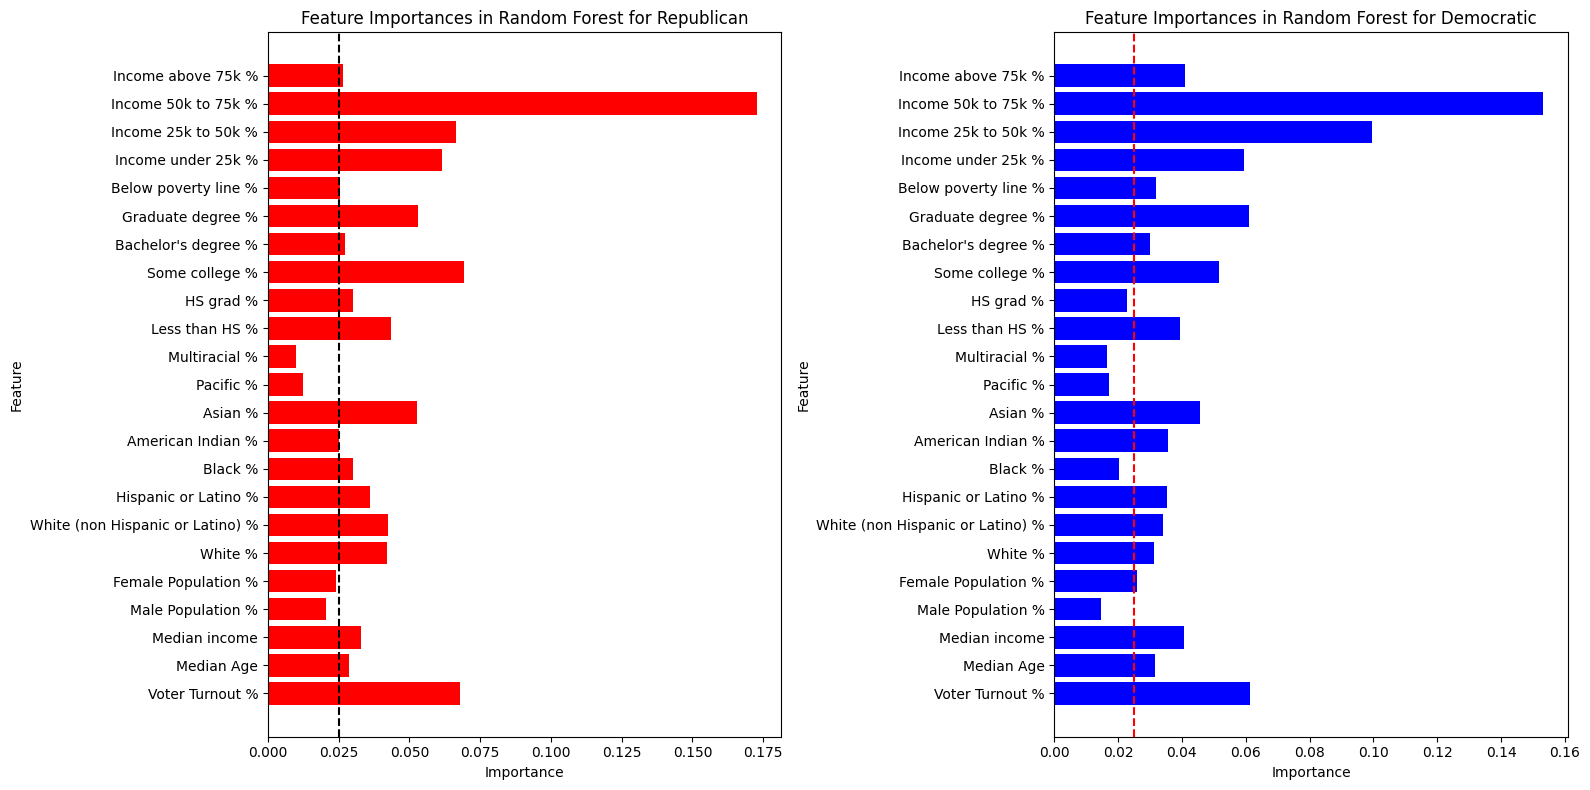

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

feature_importances_republican = best_model_rep.feature_importances_
axes[0].barh(features, feature_importances_republican, color='red')
axes[0].set_xlabel('Importance')
axes[0].set_ylabel('Feature')
axes[0].set_title('Feature Importances in Random Forest for Republican')
axes[0].axvline(x=0.025, color='black', linestyle='--')

feature_importances_democratic = best_model_dem.feature_importances_
axes[1].barh(features, feature_importances_democratic, color='blue')
axes[1].set_xlabel('Importance')
axes[1].set_ylabel('Feature')
axes[1].set_title('Feature Importances in Random Forest for Democratic')
axes[1].axvline(x=0.025, color='red', linestyle='--')

plt.tight_layout()
plt.show()

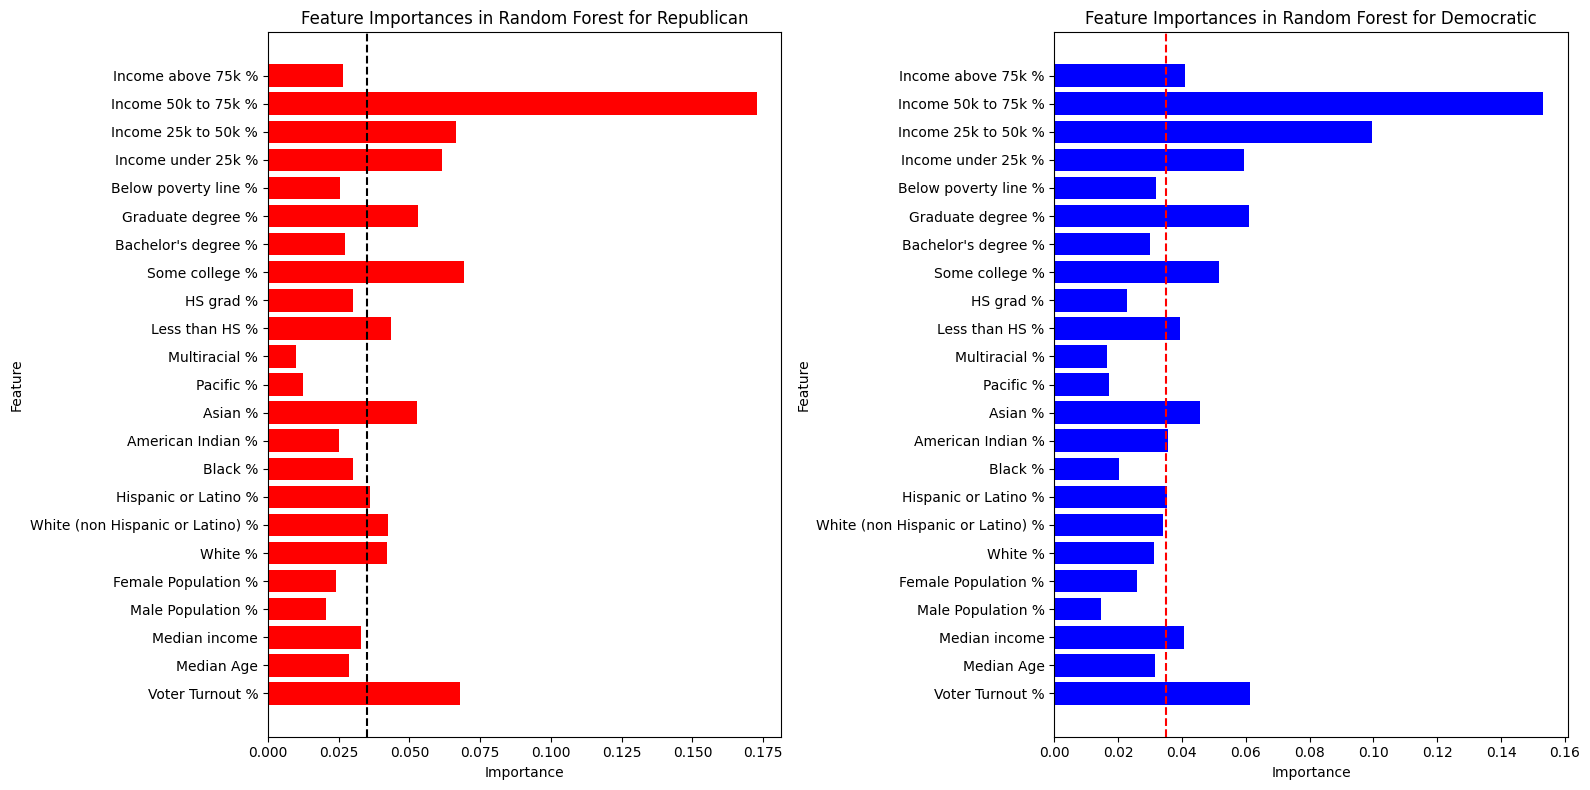

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

feature_importances_republican = best_model_rep.feature_importances_
axes[0].barh(features, feature_importances_republican, color='red')
axes[0].set_xlabel('Importance')
axes[0].set_ylabel('Feature')
axes[0].set_title('Feature Importances in Random Forest for Republican')
axes[0].axvline(x=0.035, color='black', linestyle='--')

feature_importances_democratic = best_model_dem.feature_importances_
axes[1].barh(features, feature_importances_democratic, color='blue')
axes[1].set_xlabel('Importance')
axes[1].set_ylabel('Feature')
axes[1].set_title('Feature Importances in Random Forest for Democratic')
axes[1].axvline(x=0.035, color='red', linestyle='--')

plt.tight_layout()
plt.show()

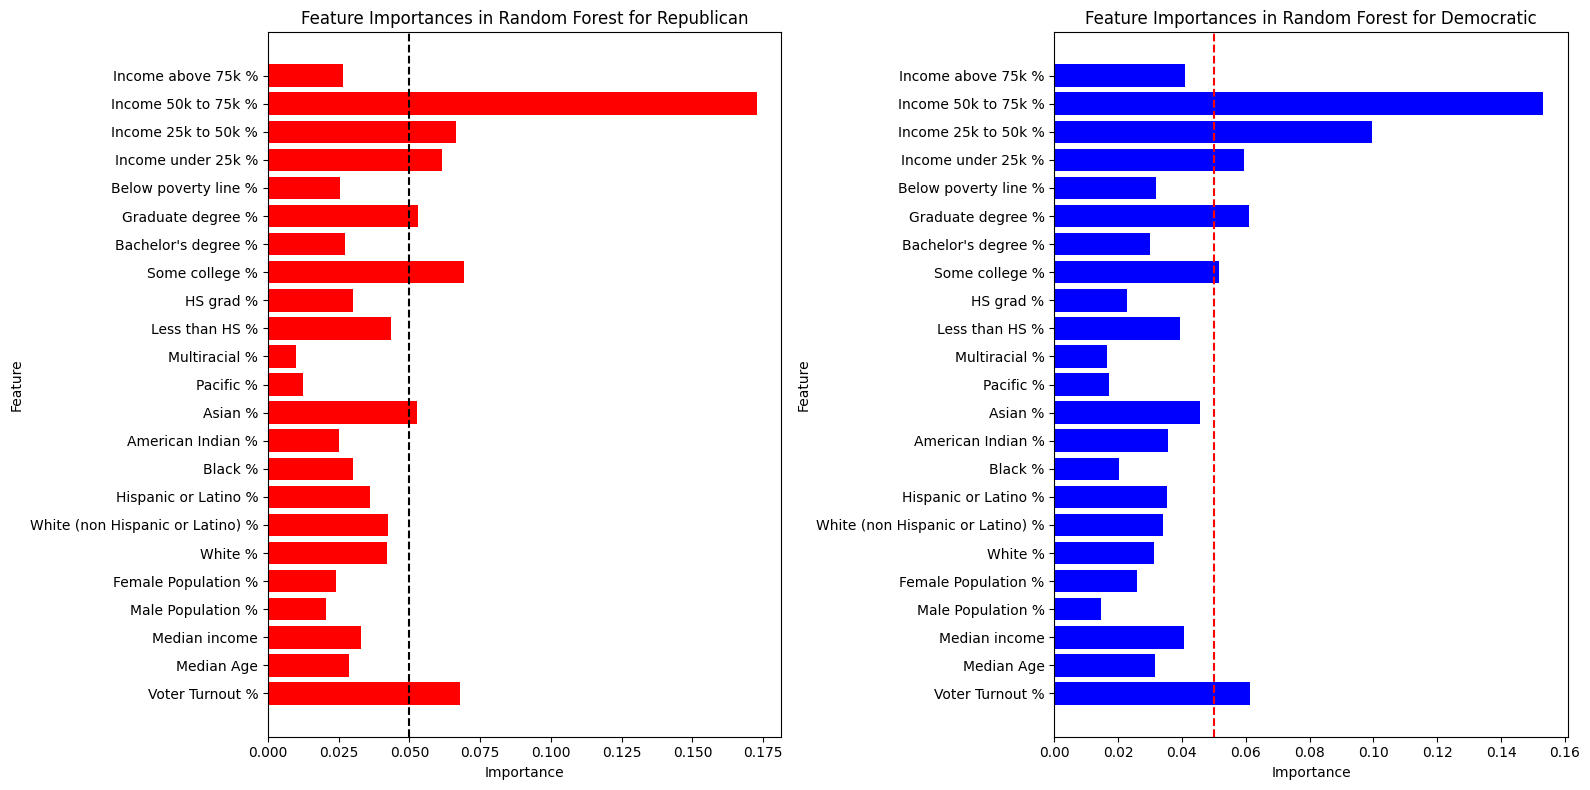

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

feature_importances_republican = best_model_rep.feature_importances_
axes[0].barh(features, feature_importances_republican, color='red')
axes[0].set_xlabel('Importance')
axes[0].set_ylabel('Feature')
axes[0].set_title('Feature Importances in Random Forest for Republican')
axes[0].axvline(x=0.05, color='black', linestyle='--')

feature_importances_democratic = best_model_dem.feature_importances_
axes[1].barh(features, feature_importances_democratic, color='blue')
axes[1].set_xlabel('Importance')
axes[1].set_ylabel('Feature')
axes[1].set_title('Feature Importances in Random Forest for Democratic')
axes[1].axvline(x=0.05, color='red', linestyle='--')

plt.tight_layout()
plt.show()